# Gradient Boosting for Regression

## Basics
### Part 1: Setup
#### 1) Imports

In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import textwrap # for wrapping answer descriptions
from solution import * # use functions from individual_soln.py

#### 2) Load and train-test-split data

In [2]:
(X_train, X_test, y_train, y_test), column_names = load_and_split_data()

### Part 2: Compare models
#### 3) Define models

In [3]:
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=1)

gdbr = GradientBoostingRegressor(learning_rate=0.1, loss='ls',
                                 n_estimators=100, random_state=1)

dtr = DecisionTreeRegressor(random_state=1)

#### 4) Perform the cross validation and display results

In [4]:
k = 10 # number of folds in the cross-validation 
cross_val(rf, X_train, y_train, k) 
cross_val(gdbr, X_train, y_train, k) 
cross_val(dtr, X_train, y_train, k); 

RandomForestRegressor     Train CV | MSE: 9.943 | R2: 0.866
GradientBoostingRegressor Train CV | MSE: 8.720 | R2: 0.882
DecisionTreeRegressor     Train CV | MSE: 16.958 | R2: 0.778


In [5]:
answer_description(4) 

4) There isn't a 'best' model at this point because the best hyperparameters
for each model haven't been determined.


#### 5) Try a gradient boosting regressor with learning rate = 1.0

In [6]:
gdbr_lr1 = GradientBoostingRegressor(learning_rate=1.0, loss='ls',
                                     n_estimators=100, random_state=1) 
print("Cross validation score of Gradient Boosting Regressor with lr = 0.1:")
cross_val(gdbr, X_train, y_train, k) 
print("Cross validation score of Gradient Boosting Regressor with lr = 1.0:")
cross_val(gdbr_lr1, X_train, y_train, k);

Cross validation score of Gradient Boosting Regressor with lr = 0.1:
GradientBoostingRegressor Train CV | MSE: 8.720 | R2: 0.882
Cross validation score of Gradient Boosting Regressor with lr = 1.0:
GradientBoostingRegressor Train CV | MSE: 23.301 | R2: 0.696


In [7]:
answer_description(5) 

5) The MSE has more than doubled with learning rate = 1.


### Part 3: Plot the error after each iteration.

#### 6) Investigate effect of the number of iterations

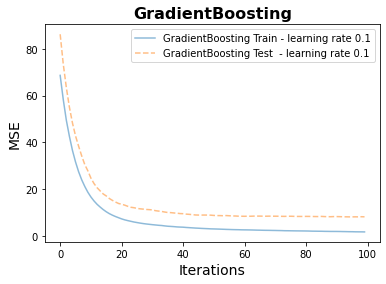

In [8]:
fig, ax = plt.subplots()
plot_stage_score(ax, gdbr, X_train, y_train, X_test, y_test)

#### 7) Investigate effect of learning rate

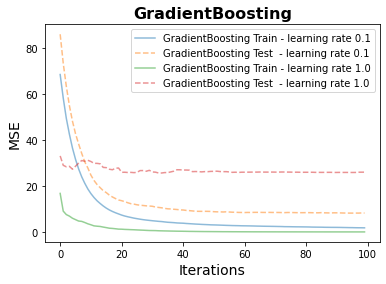

In [9]:
fig, ax = plt.subplots()
plot_stage_score(ax, gdbr, X_train, y_train, X_test, y_test)
plot_stage_score(ax, gdbr_lr1, X_train, y_train, X_test, y_test)

#### 8) Explain the plot behavior

In [10]:
answer_description(8)

8) For both learning rates the train error drops to near zero with
progressive boosting stages (iterations).  However, the larger learning
rate test error doesn't decrease as more iterations are added.  The larger
learning rate makes large changes per iteration and so likely overfits
the data.  For the lower learning rate model to get low test error, many
boosting stages are required.


#### 9) Compare the Gradient Boosting Regressor with lr = 0.1 to a Random Forest Regressor

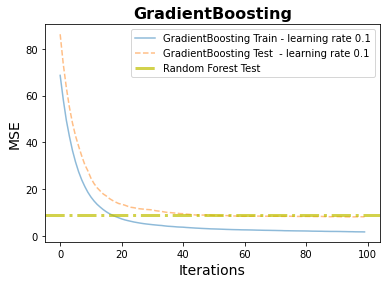

In [11]:
fig, ax = plt.subplots()
plot_stage_score(ax, gdbr, X_train, y_train, X_test, y_test)
plot_rf_score(ax, rf, X_train, y_train, X_test, y_test)

In [12]:
answer_description(9)

9) Gradient Boost outperforms Random Forest at about 60 iterations.


In [13]:
answer_description(10)

10 & 11) For both RandomForest and GradientBoosting regressors, the model
with gridsearched parameters outperformed (had a lower mse) than the 
default model.


## Advanced
### Part 4: Explore hyperparameters

#### 10) Use gridsearch to find the best hyperparameters for the Random Forest

In [14]:
random_forest_grid = {'max_depth': [3, None],
                      'max_features': ['sqrt', 'log2', None],
                      'min_samples_split': [2, 4],
                      'min_samples_leaf': [1, 2, 4],
                      'bootstrap': [True, False],
                      'n_estimators': [10, 20, 40, 80],
                      'random_state': [1]}
rf_best_params, rf_best_model = gridsearch_with_output(RandomForestRegressor(), 
                                                       random_forest_grid, 
                                                       X_train, y_train)
print("\nComparing model with gridsearch params to initial model on Test set.")
rf.fit(X_train, y_train)
display_default_and_gsearch_model_results(rf, rf_best_model, X_test, y_test)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 756 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:    9.3s finished

Result of gridsearch:
Parameter            | Optimal  | Gridsearch values
-------------------------------------------------------
max_depth            | None     | [3, None]
max_features         | None     | ['sqrt', 'log2', None]
min_samples_split    | 2        | [2, 4]
min_samples_leaf     | 1        | [1, 2, 4]
bootstrap            | True     | [True, False]
n_estimators         | 80       | [10, 20, 40, 80]
random_state         | 1        | [1]

Comparing model with gridsearch params to initial model on Test set.
Results for RandomForest
Gridsearched model mse: 9.171 | r2: 0.907
     Defa

#### 11) Use gridsearch to find the best hyperparameters for the Gradient Boosting

In [15]:
gradient_boosting_grid = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
                          'max_depth': [2, 4, 6],
                          'min_samples_leaf': [1, 2, 5, 10],
                          'max_features': [1.0, 0.3, 0.1],
                          'n_estimators': [500],
                          'random_state': [1]}
gdbr_best_params, gdbr_best_model = gridsearch_with_output(GradientBoostingRegressor(), 
                                                           gradient_boosting_grid, 
                                                           X_train, y_train)
print("\nComparing model with gridsearch params to initial model on Test set.")
gdbr.fit(X_train, y_train)
display_default_and_gsearch_model_results(gdbr, gdbr_best_model, X_test, y_test)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   19.9s finished

Result of gridsearch:
Parameter            | Optimal  | Gridsearch values
-------------------------------------------------------
learning_rate        | 0.05     | [0.1, 0.05, 0.02, 0.01]
max_depth            | 6        | [2, 4, 6]
min_samples_leaf     | 5        | [1, 2, 5, 10]
max_features         | 0.3      | [1.0, 0.3, 0.1]
n_estimators         | 500      | [500]
random_state         | 1        | [1]

Comparing model with gridsearch params to initial model on Test set.
Results for GradientBoosting
Gridsearched model mse: 8.878 | r2: 0.910
     Default model mse: 8.234 | r2: 0.917


In [16]:
answer_description(11)

10 & 11) For both RandomForest and GradientBoosting regressors, the model
with gridsearched parameters outperformed (had a lower mse) than the 
default model.
